# Task 2

In this notebook, the SIFT library is used to detect and match features of two sets of images. The dataset contains two sets of images, as per the folders 'database' and 'queries'. These sets of images both relate to satellite images. By visualizing the 'database' dataset, it can be said that a larger satellite picture has been used and smaller overlapping blocks of the image has been cropped out. Before cropping out, alphabets were printed on them. When going through the dataset, instead of finding one single image for one alphabet, ending up finding a continuous series of some images where the alphabet slowly appears and then disappears, travelling horizontally in the real larger satellite image. Also at an offset of 260 images from the blocks where the alphabet is found, the alphabet itself is seen to shift vertically. Therefore, every image represents an overlapping patch from a bigger image. In this Task, it is to be found out that which image from the 'database' actually matches the most with the images from the database. Around that image patch, the alphabet should be present. One will not get the exact match to the image containing the alphabet as the watermark itself changes the features of the image. Therefore, one will get an image very close to it.

In this Task, first one needs to extract features from all the images present in the 'database' and then compare all those feature arrays with the extracted feature arrays from the 'queries' images. Then after, by Lowe's paper, good matches should be considered only. With that consideration, the percentage of total number of matches with respect to the total number of features taken in consideration is calculated. Finally, taking the highest matching percentage of the good features and relating it to the image file that was considered for feature extraction brings the result. From this relation, getting the most probable image to match with the concerned query image. The procedure is repeated for all the query images. Finally, an added shift is introduced in the image number so that the alphabets are visible.

The following links were used:
1. https://docs.opencv.org/master/dc/dc3/tutorial_py_matcher.html
2. https://stackoverflow.com/questions/46479237/find-image-from-a-database-of-images
3. https://stackoverflow.com/questions/50217364/sift-comparison-calculate-similarity-score-python

Importing the required libraries.

In [78]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

It is discussed above that with every passing image, one moves in the horizontal direction (till 259 steps) as the images are overlapping. And with every 260th image, one moves in the vertical direction with respect to the very first image. Such a matrix of small part of the larger picture is plotted in matrix form for visualization purpose. 

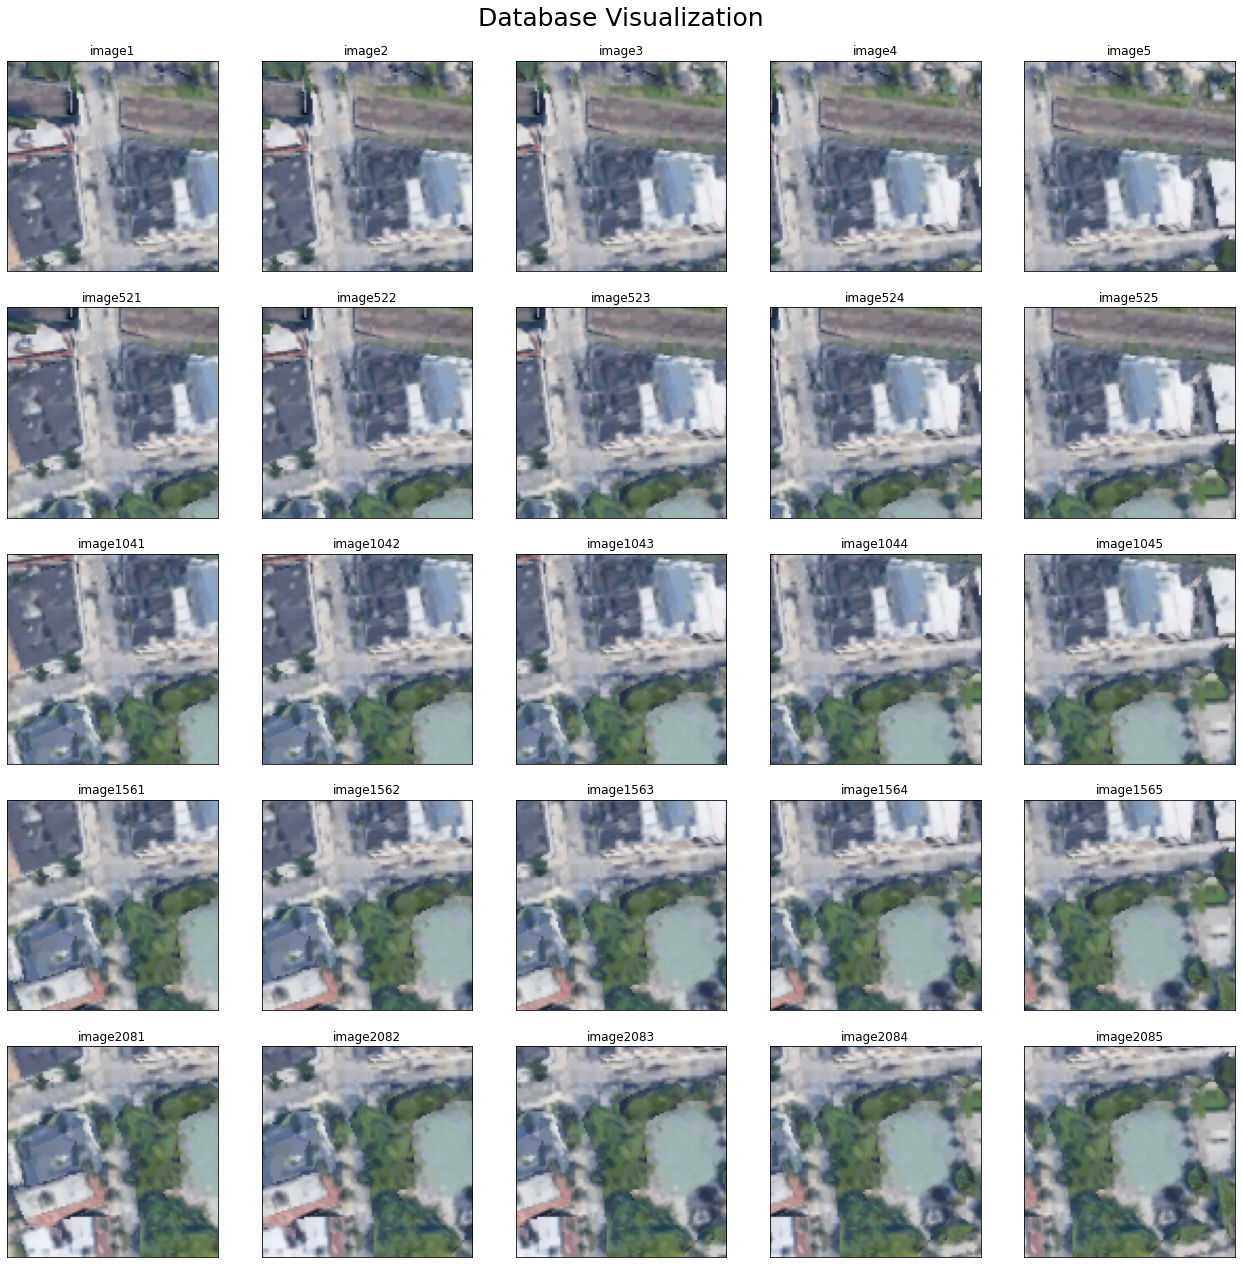

In [134]:
j=1
fig=plt.figure(figsize=(18,18))
fig.suptitle('Database Visualization', fontsize=25)
columns = 5
rows = 5
for i in range(1, columns*rows +1):
    img = mpimg.imread('database/image'+str(j)+'.png')
    fig.add_subplot(rows, columns, i)
    plt.title('image'+str(j))
    j=j+1
    if ((j-1)%5==0):
        j=j+515
    plt.tick_params(left=False,bottom=False,labelleft=False,labelbottom=False)
    plt.imshow(img)
fig.tight_layout(pad=2)
plt.savefig('Data_visualization.png')

In the following function, the primary function of the Task is dealt with, which is matching the images from the 'database' to the concerned image from 'queries'. Firstly, the images are read in gray scale, that is both the query image and the database image set. Thereafter, SIFT (Scale invariant feature transform) library is created from Open CV for detecting and computing features for images. Then onwards, Flann based matcher is initialized with index and search parameters. Using SIFT, features were detected and using Flann, a KNN-Matching was done between the query image and 'database' images, to find out the features and matches. But, one is only concerned with the good matches. Therefore, following Lowe's paper, masking was done to consider only good matches. Thereafter, from the number of good matches and the number of keypoints detected, the match percentage was calculated and stored in order. Also, the filenames were stored in order depending upon detection from local host.

In [6]:
def extract_features_and_find_match(query):

    img1 = cv.imread(query,cv.IMREAD_GRAYSCALE)# queryImage

    # Initiate SIFT detector
    sift = cv.SIFT_create()
    kp1, des1 = sift.detectAndCompute(img1,None)

    # FLANN parameters
    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_params = dict(checks=50)   # or pass empty dictionary
    flann = cv.FlannBasedMatcher(index_params,search_params)
    percentage=[]
    name=[]

    for filename in os.listdir('database'):
    
        # find the keypoints and descriptors with SIFT
        img2 = cv.imread('database/'+filename,cv.IMREAD_GRAYSCALE)
        kp2, des2 = sift.detectAndCompute(img2,None)
        matches = flann.knnMatch(des1,des2,k=2)
    
        # Need to draw only good matches, so create a mask
        # ratio test as per Lowe's paper
        good = []
        i=0
        sum=0
        for m,n in matches:
            if m.distance < 0.75*n.distance:
                good.append([m])
                a=len(good)
                percent=(a*100)/len(kp2)
                sum=sum+percent
                i=i+1
                flag=1
            else:
                average_percent_nomatch=0
                flag=0
        if (flag==1):        
            average_percent=sum/i
            percentage.append(average_percent)
            name.append(filename)
        else:
            percentage.append(average_percent_nomatch)
            name.append(filename)
    return(percentage,name)

In the following code block, each of the 5 query images are fed to the function 'extract_features_and_find_match' and in return two lists of the match percentage for every image in the database and their corresponding file names are recieved in return.

In [7]:
percentage1,name1=extract_features_and_find_match('queries/query1.png')
percentage2,name2=extract_features_and_find_match('queries/query2.png')
percentage3,name3=extract_features_and_find_match('queries/query3.png')
percentage4,name4=extract_features_and_find_match('queries/query4.png')
percentage5,name5=extract_features_and_find_match('queries/query5.png')

In the following code block, the index of the element with highest value in the percentage list is found, as it obviously corresponds to the best match and the filename of that match is extracted from the filename list. There onwards, the number of image it is in the 'database' folder is extracted and that number is incremented by 523. As discussed previously, with every 260 images, we get the same image shifting vertically and with every other image; we see the same image shifting horizontally. Therefore, to view the alphabets and have most part of the query image in the matched image, 523 was added. The distribution being 260x2=520 for vertical displacement and 3 was chosen for horizontal displacement. The vertical displacement coefficient 2 and horizontal displacement coefficient 3 was chosen by trial and error method.

In [139]:
n=523

percentage_match1=np.array(percentage1)
best_match1=np.argmax(percentage_match1)

image_num_1 = name1[best_match1].split("e")
image_1=image_num_1[1].split('.')
likely1='image'+str(int(image_1[0])+n)+'.png'
print('Best match for query 1:',name1[best_match1])
print('Adjusted match with alphabet for query 1:', likely1)

percentage_match2=np.array(percentage2)
best_match2=np.argmax(percentage_match2)

image_num_2 = name2[best_match2].split("e")
image_2=image_num_2[1].split('.')
likely2='image'+str(int(image_2[0])+n)+'.png'
print('Best match for query 2:',name2[best_match2])
print('Adjusted match with alphabet for query 2:', likely2)

percentage_match3=np.array(percentage3)
best_match3=np.argmax(percentage_match3)

image_num_3 = name3[best_match3].split("e")
image_3=image_num_3[1].split('.')
likely3='image'+str(int(image_3[0])+n)+'.png'
print('Best match for query 3:',name3[best_match3])
print('Adjusted match with alphabet for query 3:', likely3)

percentage_match4=np.array(percentage4)
best_match4=np.argmax(percentage_match4)

image_num_4 = name4[best_match4].split("e")
image_4=image_num_4[1].split('.')
likely4='image'+str(int(image_4[0])+n)+'.png'
print('Best match for query 4:',name4[best_match4])
print('Adjusted match with alphabet for query 4:', likely4)

percentage_match5=np.array(percentage5)
best_match5=np.argmax(percentage_match5)

image_num_5 = name5[best_match5].split("e")
image_5=image_num_5[1].split('.')
likely5='image'+str(int(image_5[0])+n)+'.png'
print('Best match for query 5:',name5[best_match5])
print('Adjusted match with alphabet for query 5:', likely5)

Best match for query 1: image1373.png
Adjusted match with alphabet for query 1: image1896.png
Best match for query 2: image2622.png
Adjusted match with alphabet for query 2: image3145.png
Best match for query 3: image6051.png
Adjusted match with alphabet for query 3: image6574.png
Best match for query 4: image26588.png
Adjusted match with alphabet for query 4: image27111.png
Best match for query 5: image13935.png
Adjusted match with alphabet for query 5: image14458.png


In the following code block, the query and the adjusted matched images with alphabet watermarks are plotted as results.

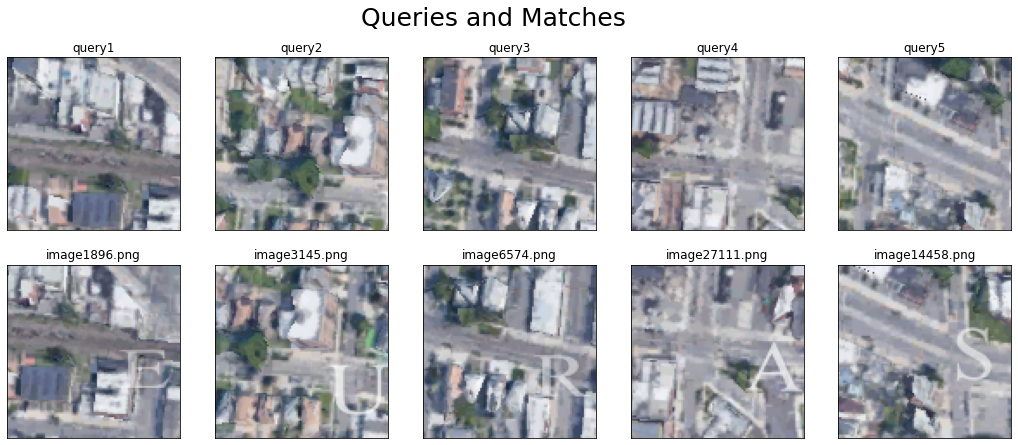

In [135]:
likely=[likely1,likely2,likely3,likely4,likely5]
columns=5
rows=2
fig=plt.figure(figsize=(18, 7))
fig.suptitle('Queries and Matches', fontsize=25)
for i in range(1, columns*rows +1):
    if (i>5):
        img=mpimg.imread('database/' + likely[i-6])
        fig.add_subplot(rows, columns, i)
        plt.title(likely[i-6])
        plt.tick_params(left=False,bottom=False,labelleft=False,labelbottom=False)
        plt.imshow(img)
    else:
        img = mpimg.imread('queries/query'+str(i)+'.png')
        fig.add_subplot(rows, columns, i)
        plt.title('query'+str(i))
        plt.tick_params(left=False,bottom=False,labelleft=False,labelbottom=False)
        plt.imshow(img)
plt.savefig('Queries_and_matches.png')